Silhouette Score (core clusters): -0.125
Davies–Bouldin Index: 1.179
Detected outliers (noise points): 54337
Actual frauds among outliers: 421


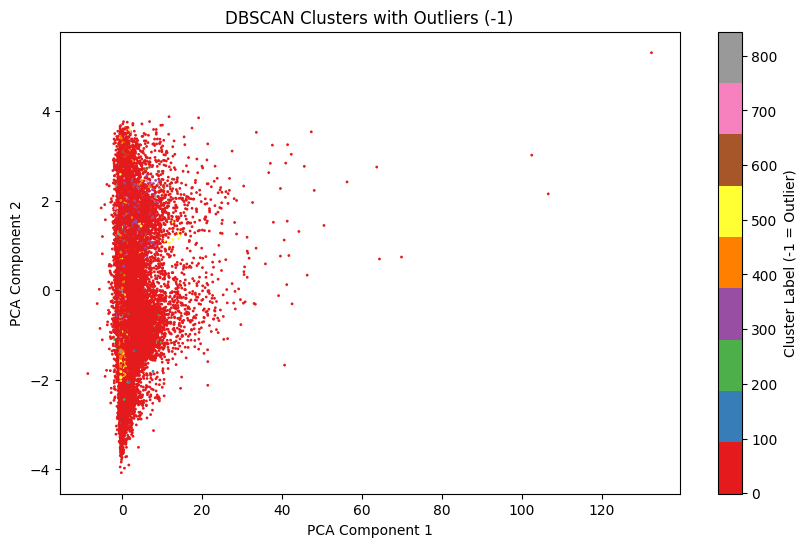

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("creditcard.csv")


# 2. Drop rows with NaNs (precautionary step)
df.dropna(inplace=True)

# 3. Prepare features for unsupervised learning
X = df.drop('Class', axis=1)

# 4. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Apply DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)  # eps needs tuning via k-distance plot
dbscan.fit(X_scaled)

# 6. Get cluster labels
labels = dbscan.labels_

# 7. Attach labels to DataFrame
df = df.reset_index(drop=True)  # Ensure alignment
df['DBSCAN_Cluster'] = labels

# 8. Evaluation: Silhouette Score (excluding noise)
mask = labels != -1
if len(set(labels[mask])) > 1:
    sil_score = silhouette_score(X_scaled[mask], labels[mask])
    print("Silhouette Score (core clusters):", round(sil_score, 3))
else:
    print("Not enough core clusters for Silhouette Score.")

# 9. Evaluation: Davies–Bouldin Index
if len(set(labels[mask])) > 1:
    db_index = davies_bouldin_score(X_scaled[mask], labels[mask])
    print("Davies–Bouldin Index:", round(db_index, 3))
else:
    print("Not enough core clusters for Davies–Bouldin Index.")
36
# 10. Outlier analysis
outliers = df[df['DBSCAN_Cluster'] == -1]
print("Detected outliers (noise points):", len(outliers))

# 11. Fraud detection among outliers
fraud_in_outliers = outliers[outliers['Class'] == 1]
print("Actual frauds among outliers:", len(fraud_in_outliers))

# 12. Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set1', s=1)
plt.title("DBSCAN Clusters with Outliers (-1)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label (-1 = Outlier)")
plt.show()
